# Ford GoBike System Data
## by Robert Grütze

## Investigation Overview

**Following questions will be adressed in this presentation:**
> *When are most trips taken in terms of time of day, day of the week, or month of the year?*

> *How long does the average trip take? and Whats the average distance for a trip taken?*

> *Does the above depend on if a user is a subscriber or customer?*

> *Are there any special patterns regading the renting behaviour to be observed?*

> *What changed in 2019 in comparison to 2017?*


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests, zipfile
import re
import os 
import calendar
import math
import folium
from folium import plugins

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('result/gobike2019_master.csv')
df_2017 = pd.read_csv('result/gobike2017_master.csv')
DF = pd.read_csv('result/gobikecombined_master.csv')

In [3]:
# set plot barameter
color_0 = sb.color_palette()[0]
color_1 = sb.color_palette()[1]
color_2 = sb.color_palette()[2]

### Question 1:
*When are most trips taken in terms of time of day, day of the week, or month of the year?*

> - renting is spiking in Oktiber and April. This is unexpected, since I would expext some kind of plateu in the summer.
- a lot of people use the bike to get to work or to go out in the evening

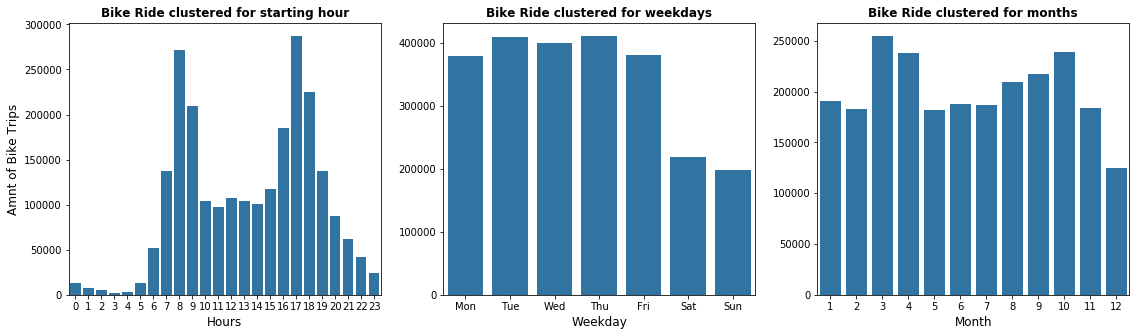

In [4]:
plt.figure(figsize=(19,5))

plt.subplot(131)
handle = sb.countplot(data=df, x='start_time_hour', color = color_0)
#handle.xaxis.set_major_locator(plt.AutoLocator)
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Amnt of Bike Trips", fontsize=12)
plt.title('Bike Ride clustered for starting hour', fontweight="bold")


plt.subplot(132)
order_weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df, x='start_time_weekday', color = color_0, order = order_weekdays)
plt.xlabel("Weekday", fontsize=12)
#handle = sb.catplot(data=df, x='start_time_weekday', kind='count', color = color_0, order = order_weekdays)
plt.yticks([0, 100e3, 200e3, 300e3, 400e3]);
plt.ylabel('')
plt.title('Bike Ride clustered for weekdays', fontweight="bold")


plt.subplot(133)
sb.countplot(data=df, x='start_time_month', color = color_0)
plt.xlabel("Month", fontsize=12)
plt.ylabel('')
plt.title('Bike Ride clustered for months', fontweight="bold")



plt.show()

## Question 2:

*How long does the average trip take?*

*Whats the average distance taken during a bike rental?*

> - On a logathmic scale a gaussian distribution can be observed. Most rentals last about 10 minutes.
> - on average people ride about 1 km
- 2.4% of rides start and end at the same station

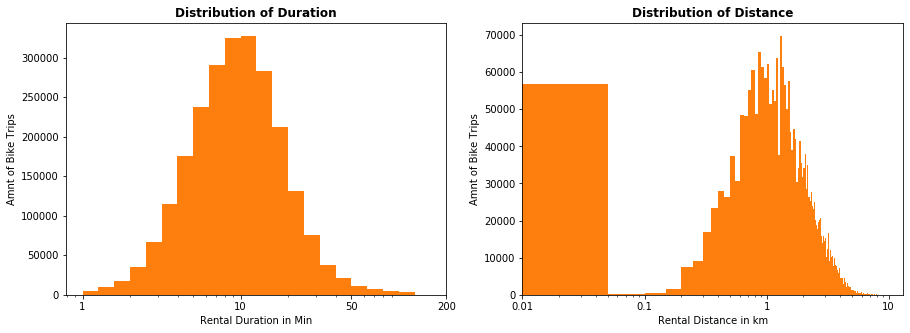

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(121)
# create axis limits accourding to describe() result
bins   = 10 ** np.arange(0, 2.08+0.1, 0.1)
ticks  = [1, 10, 50, 200]
labels = [1, 10, 50, 200]

# plot the histogram
plt.hist(data=df, x='duration_min', bins=bins, color = color_1)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('Amnt of Bike Trips')
plt.xlabel('Rental Duration in Min')
plt.title('Distribution of Duration', fontweight="bold")


plt.subplot(122)
# create axis limits accourding to describe() result
bins   = np.arange(0, 10+0.1, 0.05)
ticks  = [0.01, 0.1, 1, 10]
labels  = [0.01, 0.1, 1, 10]

# plot the histogram
plt.hist(data=df, x='distance_km', bins=bins, color = color_1)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Rental Distance in km')
plt.ylabel('Amnt of Bike Trips')
plt.title('Distribution of Distance', fontweight="bold")

plt.show()

### Question 3:
*How important is it if the customer is a subscriber or not?*
> - 80% of all users of the service were subscribers
- seems like a highly established service
- customer tend to rent bikes for a longer period of time and thus generate more revenue

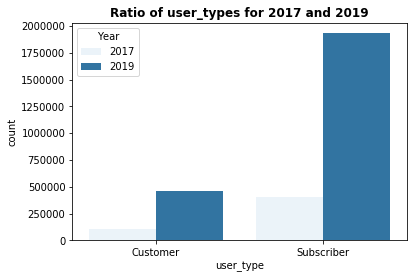

In [6]:
sb.countplot(data=DF, x='user_type', color = color_0, hue='Key');
plt.legend(title='Year')
plt.grid(False)
plt.title('Ratio of user_types for 2017 and 2019', fontweight="bold")
plt.show()

## Question 4:
*Are there any special patterns regading the renting behaviour to be observed?*
> - the renting duration is very similar for both usertypes 
- when it comes to increase the renting duration (and therefore the revenue), it is advised to provide enough bikes:
- in the summer
- on the weekend
- the correlation between distance and duration is not as strong as assumed
- people seem to rent bikes in the middle of the night longer than usual


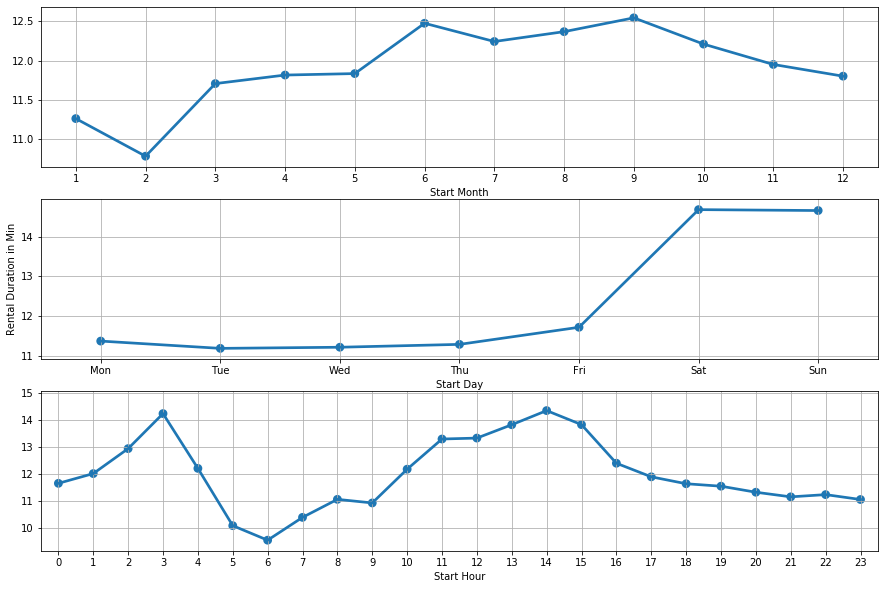

In [7]:
plt.figure(figsize=(15,10))

plt.subplot(311)
sb.pointplot(data=df, x='start_time_month', y='duration_min', errwidth=0)
plt.xlabel('Start Month')
plt.ylabel('')
plt.grid()

plt.subplot(312)
sb.pointplot(data=df, x='start_time_weekday', y='duration_min', errwidth=0, order = order_weekdays)
plt.xlabel('Start Day')
plt.ylabel('Rental Duration in Min')
plt.grid()

plt.subplot(313)
sb.pointplot(data=df, x='start_time_hour', y='duration_min', errwidth=0)
plt.xlabel('Start Hour')
plt.ylabel('')
plt.grid()
plt.show()

## Question 5:
*What changed in comparison to 2017?*
> - the seasonal impact of more longer rentals in the summer is more noticable for the customer group
- the hype impact at the beginnning of the service is more noticable for the customer group
- on the weekend both user_types rent bikes for a longer period of time. This has not been changed compared to 2017.
- on average subscribers rent bikes now for a similar amount of time compared to the beginning of the service in 2017
- the service is a great sucess and has increased its userbase by a wide margin
- the service provider should try to market the service towards non subscribers more

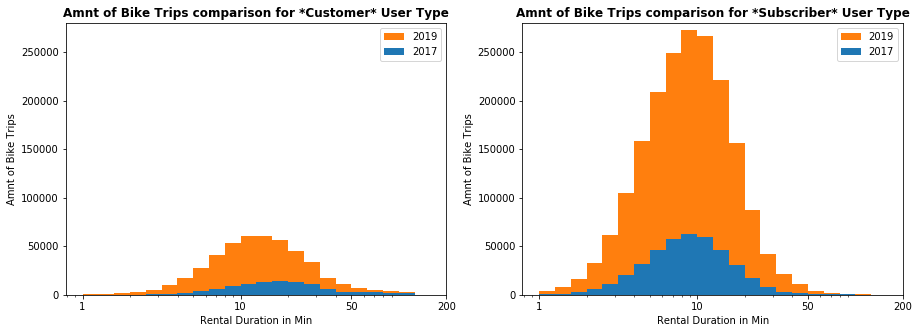

In [8]:
# usee axis limits from previous plots
bins   = 10 ** np.arange(0, 2.08+0.1, 0.1)
ticks  = [1, 10, 50, 200]
labels = [1, 10, 50, 200]

#sb.set(font_scale=1.2)
plt.figure(figsize=(15,5))

# plot the histogram
plt.subplot(121)
plt.hist(data=df.query('user_type == "Customer"'), x='duration_min', bins=bins, color = color_1, alpha=1, label='2019')
plt.hist(data=df_2017.query('user_type == "Customer"'), x='duration_min', bins=bins, color = color_0, alpha=1, label='2017')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('Amnt of Bike Trips')
plt.xlabel('Rental Duration in Min')
plt.legend(loc='upper right')
plt.ylim(0, 280e3) 
plt.title('Amnt of Bike Trips comparison for *Customer* User Type', fontweight="bold")

# plot the histogram
plt.subplot(122)
plt.hist(data=df.query('user_type == "Subscriber"'), x='duration_min', bins=bins, color = color_1, alpha=1, label='2019')
plt.hist(data=df_2017.query('user_type == "Subscriber"'), x='duration_min', bins=bins, color = color_0, alpha=1, label='2017')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('Amnt of Bike Trips')
plt.xlabel('Rental Duration in Min')
plt.legend(loc='upper right')
plt.ylim(0, 280e3) 
plt.title('Amnt of Bike Trips comparison for *Subscriber* User Type', fontweight="bold")
plt.show()

In [9]:
DF_customer   = DF.query('user_type == "Customer"')
DF_subscriber = DF.query('user_type == "Subscriber"')

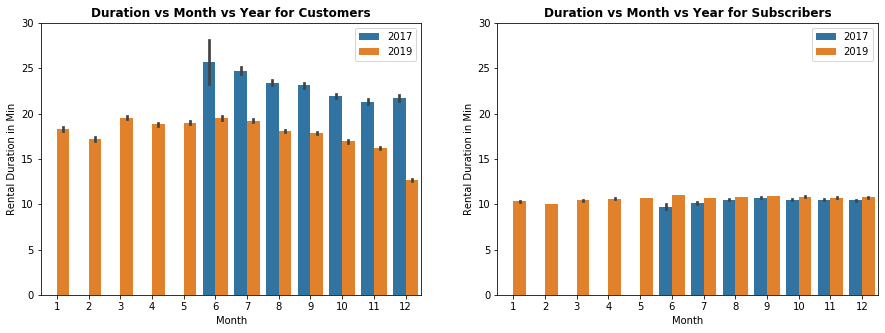

In [10]:
# duration over the months
plt.figure(figsize=(15,5))

plt.subplot(121)
sb.barplot(data=DF_customer, x='start_time_month', y='duration_min', hue='Key')
plt.xlabel('Month')
plt.ylabel('Rental Duration in Min')
plt.legend(title='Year');
plt.title('Duration vs Month vs Year for Customers', fontweight="bold")
#plt.gcf().set_size_inches(12, 6)
plt.ylim(0, 30) 
plt.legend(loc='upper right')


plt.subplot(122)
sb.barplot(data=DF_subscriber, x='start_time_month', y='duration_min', hue='Key')
plt.xlabel('Month')
plt.ylabel('Rental Duration in Min')
plt.legend(title='Year');
plt.ylim(0, 30) 
plt.title('Duration vs Month vs Year for Subscribers', fontweight="bold")
#plt.gcf().set_size_inches(12, 6)
plt.legend(loc='upper right')
plt.show()


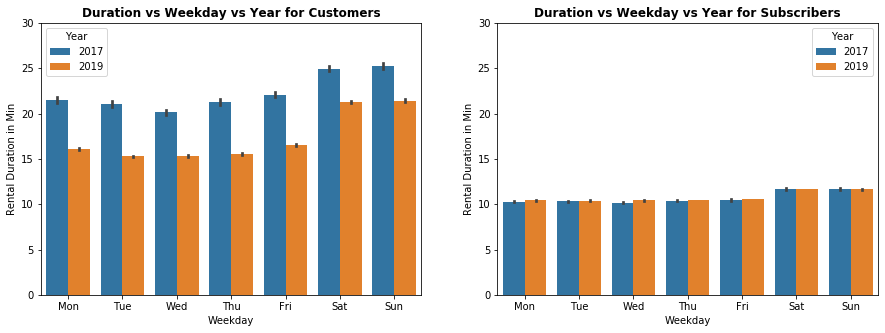

In [11]:
# duration over weekdays
order_weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(15,5))

plt.subplot(121)
sb.barplot(data=DF_customer, x='start_time_weekday', y='duration_min', hue='Key', order = order_weekdays)
plt.xlabel('Weekday')
plt.ylabel('Rental Duration in Min')
plt.legend(title='Year');
plt.ylim(0, 30) 
plt.title('Duration vs Weekday vs Year for Customers', fontweight="bold")
#plt.gcf().set_size_inches(12, 6)

plt.subplot(122)
sb.barplot(data=DF_subscriber, x='start_time_weekday', y='duration_min', hue='Key', order = order_weekdays)
plt.xlabel('Weekday')
plt.ylabel('Rental Duration in Min')
plt.ylim(0, 30) 
plt.legend(title='Year');
plt.title('Duration vs Weekday vs Year for Subscribers', fontweight="bold")
#plt.gcf().set_size_inches(12, 6)
plt.show()

## Summary

### Recommendation for GoBike
> There is potential of customers, which are not yet subscribers and could be targeted by advertisment. These 20% did not change much compared back to 2017. 

> GoBike should schedule their maintanance hours towards the Winter or the night but not nessacarly on the weekend. Since technically less rentels happen on the weekend but these rentals last much longer. A shortage of bikes could lead unsatisfied customers.

> In General the amount of bike trips increased vastly over the years, which indicates a successful/profitable service offer and acceptence by the customer.

### Univariate Conclusions for 2019

> - Most rentals happen in the morning or in the evening when people are about to start work or get home from work
- Most rentels happen on weekdays when people have to go to work
- There is no real seasonal impact on the rentals observable, this might be because the weather in the bay area is always quite mild
- There are 3 regions for the stations
    - San Francisco
    - Oakland
    - San Jose
- On average people ride about 1km
- On average people ride about 10 min
- Distributions for the distance and the rental time were highly right skewed. Therefore a log scale made the result more understandable.

### Bivariate Conclusions for 2019

> - A medium correlation (r~0.5) indicates that long rental duration comes with somewhat longer rides
- In contrast to the amount of rentals over the months a clear seasonal influence can be observed
- People rent bikes for a longer period of time in the summer
- People rent bikes on the weekend for a longer period of time


### Multivariate Conclusions

> - The seasonal impact of more longer rentals in the summer is more noticable for the customer group
- When the service launched in 2017 a spike in car rentals is very noticable for the customer group and probabily an indication of good advertisement
- On the weekend both user_types rent bikes for a longer period of time. This has not been changed compared to 2017.
- On average customers rent bikes way shorter in 2019 compared to the beginning of the service in 2017
- On average subscribers rent bikes in 2019 for a similar amount of time compared to the beginning of the service in 2017